In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Load the Dataset
df = pd.read_csv("Titanic-Dataset.csv")
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [3]:
# Dataset structured information
print("Overview of dataset:")
print(df.info())

Overview of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
#missing Values counting
print("Total Missing Values Count:")
print(df.isnull().sum())

Total Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Data Cleaning
# Fill missing Age values with the median
df['Age'] = df['Age'].fillna(df['Age'].median())


In [6]:
# Fill missing Embarked values with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [7]:
# Drop Cabin column 
df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [8]:
print(df)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female  28.0      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

In [9]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [10]:
print(df)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500         2
1              2         1       1    0  38.0      1      0  71.2833         0
2              3         1       3    0  26.0      0      0   7.9250         2
3              4         1       1    0  35.0      1      0  53.1000         2
4              5         0       3    1  35.0      0      0   8.0500         2
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000         2
887          888         1       1    0  19.0      0      0  30.0000         2
888          889         0       3    0  28.0      1      2  23.4500         2
889          890         1       1    1  26.0      0      0  30.0000         0
890          891         0       3    1  32.0      0      0   7.7500         1

[891 rows x 9 columns]


In [11]:
# Verify the cleaned dataset
print("Cleaned Dataset:")
print(df.info())

Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB
None


In [12]:
# Feature Selection
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Building Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Model Evaluation
y_pred = model.predict(X_test)

In [16]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8268156424581006


In [17]:
print("\nClassification_Report:")
print(classification_report(y_test, y_pred))


Classification_Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



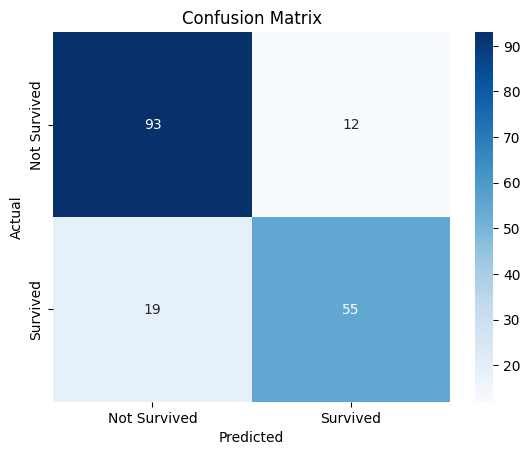

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
# Save the Model
joblib.dump(model, "Titanicmodel.pkl")
print("Model saved as a 'Titanicmodel.pkl'")

Model saved as a 'Titanicmodel.pkl'


In [21]:
# Load and Test Saved Model titanicmode
loaded_model = joblib.load("titanicmodel.pkl")
loaded_model_pred = loaded_model.predict(X_test)
print("\nAccuracy of Loaded Model:")
print(accuracy_score(y_test, loaded_model_pred))


Accuracy of Loaded Model:
0.8268156424581006
